### CHECKING IPOs PERFORMANCE IN THE FIRST 2 YEARS

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
#stocksv variable has all the stocks
#data has the original stocks
#data1 has all the non NAN rows
#Prices1 takes into account changes since the start
#returnall all the changes

### Import stocks from yfinance

In [141]:
import yfinance as yf

today = date.today()
d1 = today.strftime("%Y-%m-%d")
stocksv = ['BABA', 'V', 'TWTR', 'FB', 'BYND', 'TCEHY', 'GOOGL', 'GM', 'SNAP', 'SPOT', 'PLUG']
data = yf.download(stocksv,start="1990-01-01", end=d1)

[*********************100%***********************]  11 of 11 completed


### Find the closing price for each stock 

In [142]:
adjclose = data['Adj Close']
adjclose.head(3)

,BABA,BYND,FB,GM,GOOGL,PLUG,SNAP,SPOT,TCEHY,TWTR,V
Date,,,,,,,,,,,
1999-10-29,NaN,NaN,NaN,NaN,NaN,160.00,NaN,NaN,NaN,NaN,NaN
1999-11-01,NaN,NaN,NaN,NaN,NaN,160.00,NaN,NaN,NaN,NaN,NaN
1999-11-02,NaN,NaN,NaN,NaN,NaN,178.75,NaN,NaN,NaN,NaN,NaN


### Convert the dataframe to list. We do not want datetime index. Added the header on top of the list

In [143]:
body= adjclose.values.tolist()
headers = adjclose.columns.tolist()
body.insert(0,headers)

### Convert lists back to Dataframe. Shifted rows up.

In [144]:
df = pd.DataFrame(data= body, dtype = 'float')
df = df.apply(lambda x: pd.Series(x.dropna().values))
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head(3)

,BABA,BYND,FB,GM,GOOGL,PLUG,SNAP,SPOT,TCEHY,TWTR,V
1,93.89,65.75,38.23,26.4252,50.2202,160,24.48,149.01,4.31974,44.9,12.8892
2,89.89,66.79,34.03,26.4793,54.2092,160,27.09,144.22,4.34885,41.65,14.68
3,87.17,74.79,31,26.3402,54.7548,178.75,23.77,143.99,4.17226,42.9,13.626


https://stackoverflow.com/questions/43119503/how-to-remove-blanks-nas-from-dataframe-and-shift-the-values-up

### Check to see if the dataframe is float (nummeric) - it is not

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 1 to 5480
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BABA    1735 non-null   object
 1   BYND    574 non-null    object
 2   FB      2322 non-null   object
 3   GM      2699 non-null   object
 4   GOOGL   4274 non-null   object
 5   PLUG    5480 non-null   object
 6   SNAP    1119 non-null   object
 7   SPOT    846 non-null    object
 8   TCEHY   2920 non-null   object
 9   TWTR    1952 non-null   object
 10  V       3373 non-null   object
dtypes: object(11)
memory usage: 471.1+ KB


### Need all values to be float for Seaborne

In [156]:
#Need all float for Seaborne
df = df.apply(pd.to_numeric)

### Create dataframe for price evolution

In [157]:
Prices= df.head(730)
#Prices= data1['Adj Close'].head(400)
Prices.head(3)
#divide all dataframe by first line of data to enable comparison
Prices1 = Prices/Prices.iloc[0]
Prices1.tail(5).round(2)

,BABA,BYND,FB,GM,GOOGL,PLUG,SNAP,SPOT,TCEHY,TWTR,V
726,1.69,NaN,2.15,1.00,5.41,0.34,0.78,2.38,1.48,0.52,1.30
727,1.68,NaN,2.15,1.00,5.41,0.32,0.78,2.45,1.51,0.53,1.29
728,1.68,NaN,2.17,1.02,5.43,0.31,0.78,2.35,1.50,0.51,1.31
729,1.62,NaN,2.18,1.03,5.43,0.33,0.79,2.26,1.47,0.51,1.33
730,1.62,NaN,2.16,1.03,5.50,0.33,0.78,2.25,1.47,0.51,1.34


In [159]:
Prices1.describe().round(3)

,BABA,BYND,FB,GM,GOOGL,PLUG,SNAP,SPOT,TCEHY,TWTR,V
count,730.000,574.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000
mean,0.987,1.957,1.279,0.817,3.436,1.798,0.564,1.209,1.103,0.777,1.269
std,0.214,0.485,0.570,0.157,1.189,1.848,0.167,0.419,0.210,0.306,0.209
min,0.611,0.822,0.464,0.550,0.997,0.289,0.204,0.717,0.721,0.312,0.753
25%,0.845,1.673,0.708,0.683,2.278,0.595,0.460,0.933,0.920,0.494,1.143
50%,0.927,2.030,1.283,0.808,3.772,1.021,0.578,1.012,1.075,0.811,1.291
75%,1.101,2.270,1.891,0.946,4.463,2.384,0.653,1.284,1.263,1.018,1.421
max,1.692,3.573,2.231,1.140,5.503,9.359,1.107,2.447,1.637,1.633,1.729


### Beautiful and Dynamic Seaborn Plot

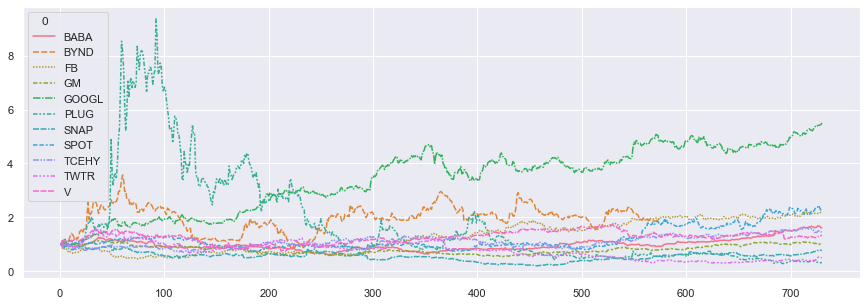

In [160]:
sns.lineplot(data= Prices1.iloc[:, :])
import seaborn as sns

sns.set(rc={'figure.figsize':(15,5)})

In [150]:
#sns.pairplot(Prices1)